# Common Univariate Random Variables

There are named random variable distributions in excess of 200. Each of these are developed and named to express real world data based obsertations in order to enable description of the randomness observed regarding the behaviour. This chapter focuses on the named random variables that are commonly utilized in the Financial space.

Risk Managers model uncertainty in many shapes and forms both with discrete and continous random variables.

**The key discrete random variables are:**

**- The "Bernoulli" - Which was touched uppon in CH2**

A general purpouse distribution that is typically used to model binary events, like defaults.

**- The Binomial**

Describes the sum of $n$ independent Bernoulli random variables. 

**- And the Poisson**

Commonly used to model Hazard Rates, which is the count of the number of events that occur in a fixed unit of time / observartions. For example think about the number of corporations that default in a quarter.


There is a wider variety of continous distibutions used by risk managers to model uncertainty persay. 

**- The most basic is a uniform distribution, which serves as a foundation for all random variables.**

**- The most widely used distribution is the well known Gaussean / Normal distribution, which is usually utilized for modelling returns, and for statistical tests**

**- Many other build uppon the Gaussean with slights twists like Student's t, the Chi - Square, and the F, which can be encountered in case of evaluation of statistical models**

## Discrete Random Variables

### Bernoulli 

Been toroughly touched uppon in CH2. 

### Binomial

A binomial random variable measures the total number of successes from $n$ independent Bernoully random variables, where each has a probability of success equal to $p$. In other words, binomial distributions are used to model counts of independent events.

A binomial distribution has 2 parameters:

1. $n$, the number of independent events, and
2. $p$, the probability of each experiment that's successful

If $n$ variables $X_i$ ~ $Bernoulli(p)$ are indepentent, then a binomial with parameters $n$ and $p$ is defined as $$
Y = \sum_{i=1}^n X_i,
$$
$\text{where } Y \sim \text{Binomial}(n, p)$, or $B(n, p)$.


In [25]:
import random
def Bernoulli(p):
    """Simulate a Bernoulli trial with success probability p."""
    return 1 if random.random() < p else 0

    
def B(n, p):
    """Simulate a Binomial random variable as the sum of n independent Bernoulli trials."""
    Y = 0
    for _ in range(n):
        Y += Bernoulli(p)   # Sum of n Bernoulli(p) variables, note that basically we just 
    return Y                # Wrapped Bernoulli which gives 0, or 1 to a function that does the 
                            # Experiment n times, and outs the sum of successful experiments!
                            # In the book they indirectly implied how to program this mate...
    

p: float  = 0.4             # Probability of successful experiment: 40%
n: float  = 100             # Trials
count:int = B(n, p)         # Of succesful experiments
print(f"Utilizing random's random.() method after {n} INDEPENDENT experiment with")
print(f"an individual success probability of {p*100}% we got {count} successful experiments")

Utilizing random's random.() method after 100 INDEPENDENT experiment with
an individual success probability of 40.0% we got 41 successful experiments


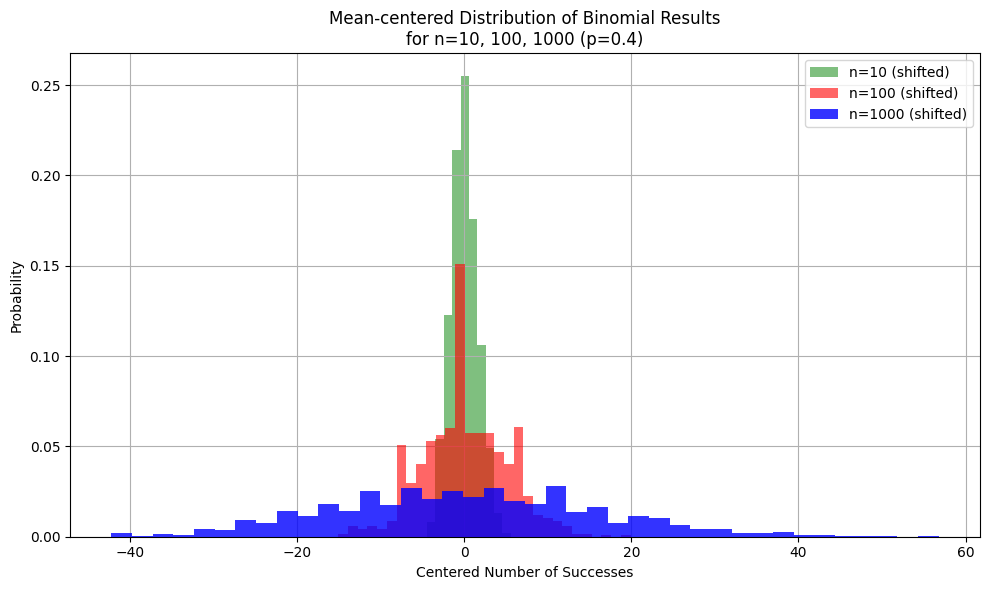

In [4]:
# Ok let's play with this! 
import matplotlib.pyplot as plt
import numpy as np

# Simulation parameters
n_1 = 10
n_2 = 100
n_3 = 1000
simulations = 1000

# Simulate results
n_1_results = [B(n_1, p) for _ in range(simulations)]
n_2_results = [B(n_2, p) for _ in range(simulations)]
n_3_results = [B(n_3, p) for _ in range(simulations)]

# Mean-center ("shift") so that all three distributions peak at zero
n_1_results_shifted = [x - np.mean(n_1_results) for x in n_1_results]
n_2_results_shifted = [x - np.mean(n_2_results) for x in n_2_results]
n_3_results_shifted = [x - np.mean(n_3_results) for x in n_3_results]

# Plotting
plt.figure(figsize=(10,6))

# Plot green at back
plt.hist(n_1_results_shifted, bins=np.arange(min(n_1_results_shifted), max(n_1_results_shifted)+2)-0.5,
         alpha=0.5, color='green', density=True, label=f'n={n_1} (shifted)', zorder=1)

# Plot red in middle
plt.hist(n_2_results_shifted, bins=30,
         alpha=0.6, color='red', density=True, label=f'n={n_2} (shifted)', zorder=2)

# Plot blue on top
plt.hist(n_3_results_shifted, bins=40,
         alpha=0.8, color='blue', density=True, label=f'n={n_3} (shifted)', zorder=3)

plt.xlabel('Centered Number of Successes')
plt.ylabel('Probability')
plt.title('Mean-centered Distribution of Binomial Results\nfor n=10, 100, 1000 (p=0.4)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Okay, so what we see here? What I wanted to demonstrate is: 

(1) Touching back to prev chapter's statement that skewness is being a lot of times misunderstood as peakyness. On the contraty here all 3 distros are emergent from the same function, and probability, while the only thing we changed are the number of experiments! Thus, the nominal standard decviation (variance...) increases, but comparatively to $n$ roughly they remain the same. But since we have to pick a scaleing for X-axis, the peakyness changes, since there is a broader range $X$ is being displayed on than the realistic PMF, or actually observed realized density distributions in this instance, so while all 3 distributions are being similarly skewed, we happen to see wildly different peakyness on the chart for them!

(2) As the number of trials n grows larger, the Binomial distribution tends to approximate a Normal distribution according to the Central Limit Theorem, especially when mean-centering and scaling. This is why your histogram plots with increasing n look more symmetric and bell-shaped centered around the mean!

I highly recomment 3Bron1Blue's CLT video: https://www.youtube.com/watch?v=zeJD6dqJ5lo

p=0.4 n=10 results statistics:
  Mean: 3.9430
  Variance: 2.6158
  Skewness: 0.1675
  Excess Kurtosis: -0.2036

p=0.4 n=100 results statistics:
  Mean: 40.0890
  Variance: 25.7011
  Skewness: 0.0996
  Excess Kurtosis: 0.1408

p=0.4 n=1000 results statistics:
  Mean: 400.2230
  Variance: 252.0593
  Skewness: 0.1449
  Excess Kurtosis: -0.0766



So the mean ($E[Y]$) follows directly from the properities of moments described in CH2:$$E[Y] = \sum_{i=1}^{n} p = p + p + p + \cdots + p = n \cdot p$$

Meanwhile the variance of $Y$ ($V[Y]$) is:$$V[Y] = n \cdot p \cdot (1-p)$$

Note that if you run a random function based practical experimentation the EXPECTED mean and varianve is expressed as per above, but the actual realized values may differ! 

In [10]:
def E_Y (n, p):
    return n * p #E[Y]
def V_Y (n, p):
    return n * p * (1-p) #V[Y]


from scipy.stats import skew, kurtosis
import numpy as np

def descriptive_stats(data, label, n, p=0.4):
    mean_val = np.mean(data)
    var_val = np.var(data)
    skew_val = skew(data)
    kurt_val = kurtosis(data)    # Returns excess kurtosis
    E_Y_n = E_Y(n, p)
    V_Y_n = V_Y(n, p)
    print(f"{label} statistics:")
    print(f"  Mean: {mean_val:.4f}")
    print(f"  E[Y]: {E_Y_n:.4f}")
    print(f"  Variance: {var_val:.4f}")
    print(f"  V[Y]: {V_Y_n:.4f}")
    print(f"  Skewness: {skew_val:.4f}")
    print(f"  Excess Kurtosis: {kurt_val:.4f}\n")

# Then call the function like this:
descriptive_stats(n_1_results, "p=0.4 n=10 results", n_1)
descriptive_stats(n_2_results, "p=0.4 n=100 results", n_2)
descriptive_stats(n_3_results, "p=0.4 n=1000 results", n_3)


p=0.4 n=10 results statistics:
  Mean: 3.9430
  E[Y]: 4.0000
  Variance: 2.6158
  V[Y]: 2.4000
  Skewness: 0.1675
  Excess Kurtosis: -0.2036

p=0.4 n=100 results statistics:
  Mean: 40.0890
  E[Y]: 40.0000
  Variance: 25.7011
  V[Y]: 24.0000
  Skewness: 0.0996
  Excess Kurtosis: 0.1408

p=0.4 n=1000 results statistics:
  Mean: 400.2230
  E[Y]: 400.0000
  Variance: 252.0593
  V[Y]: 240.0000
  Skewness: 0.1449
  Excess Kurtosis: -0.0766



Note that the mean and variance for Binomial are simply the mean and varianve of Bernoulli multiplied by $n$, meaning that $E[Y]$ and $V[Y]$ scale linearly with $n$, since each of the "experiments" are independent. The $p(1-p)$ component reflects the uncertainty coming from the Bernoulli random variables, while $n$ considers the number of independent component variables.

By conclusion, a binomial random variable is always non-negative, integer-valued, and a $B(n, p)$ is always lwss than or equal to $n$ -- equal in case of $p = 1.00$.

The skewness of a binomial depends on $p$, with small values produce right skewed distributions. The PMF of a $B(n, p)$ is:
$$f_Y(y) = \binom{n}{y} p^y (1 - p)^{n - y}$$

Note that $\binom{n}{y}$ is commonly expressed as "n choose y", which counts the number of distinct ways that $y$ successes could have been realized from $n$ experiments. It is equivalent to:$$ \binom{n}{y} = \frac{n!}{y!(n-y)!}$$ Where "!" indicates the factorial.



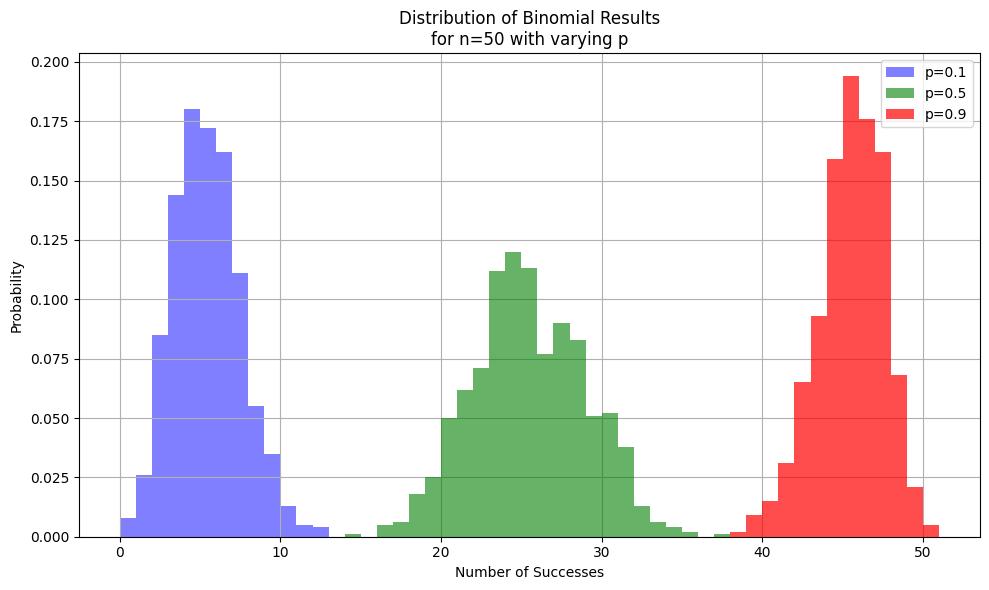

p=0.1 n=50 results statistics:
  Mean: 4.9450
  E[Y]: 5.0000
  Variance: 4.4960
  V[Y]: 4.5000
  Skewness: 0.3465
  Excess Kurtosis: 0.0292

p=0.5 n=50 results statistics:
  Mean: 24.9700
  E[Y]: 25.0000
  Variance: 12.4971
  V[Y]: 12.5000
  Skewness: 0.0801
  Excess Kurtosis: -0.2557

p=0.9 n=50 results statistics:
  Mean: 45.0060
  E[Y]: 45.0000
  Variance: 4.3060
  V[Y]: 4.5000
  Skewness: -0.4418
  Excess Kurtosis: 0.1044



In [15]:
# ---------------------- Parameters -----------------------------
n: int = 50               # number of trials per experiment
simulations = 1000        # number of repeated experiments
p_1: float = 0.1          # 10% chance of success
p_5: float = 0.5          # 50% chance of success
p_9: float = 0.9          # 90% chance of success

# ---------------- Simulate results for each p -------------------
results_p1 = [B(n, p_1) for _ in range(simulations)]
results_p5 = [B(n, p_5) for _ in range(simulations)]
results_p9 = [B(n, p_9) for _ in range(simulations)]

# ----------------------- Plotting -------------------------------
plt.figure(figsize=(10, 6))

plt.hist(results_p1, bins=range(n+2), alpha=0.5, color='blue', density=True, label='p=0.1', zorder=1)
plt.hist(results_p5, bins=range(n+2), alpha=0.6, color='green', density=True, label='p=0.5', zorder=2)
plt.hist(results_p9, bins=range(n+2), alpha=0.7, color='red', density=True, label='p=0.9', zorder=3)

plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title(f'Distribution of Binomial Results\nfor n={n} with varying p')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------- Print descriptive statistics for each p --------
descriptive_stats(results_p1, f"p={p_1} n={n} results", n, p_1)
descriptive_stats(results_p5, f"p={p_5} n={n} results", n, p_5)
descriptive_stats(results_p9, f"p={p_9} n={n} results", n, p_9)


Note that above for p = 10%; the experiment distro is positively skewed as expected, for p = 5, its roughly symmetrical, for high p, its negatively skewed as expected!


The PMF for any values of y and n can be computed using basic probability. For example, consider a binomial random var, that models the flipping of two coins. In this case, label an outcome of heads to represent success {i.e if head; Bernoulli(p = 0.5) = 1.00}, whereas a tails will be considered a failure (0). This var can be expressed as $Y ~ B(2,0.5)$. Note that:

- n = 2 cause 2 flips
- p = 0.5 cause each flip has 50% chance of success i. e. Heads

When 2 coins are flipped, there are 4 possible outcomes: {Tails, Tails}; {Tails, Heads}; {Heads, Heads}; {Heads, Tails}.

This means the number of successes - count("Heads") - is either 0, 1 or 2.

In [21]:
# --------------- Let's capture the setup --------------
p_heads: float = 0.5                 # P(Heads)
p_tails: float = 1 - p_heads         # P(Tails)
n:int = 2                            # Tosses
# This can be written as a Bernoulli, since coin tosses have 2 outcomes
for toss in range(n):
    outcome = Bernoulli(p_heads)     # Representing Heads event as "successful experiment"
    if outcome == True:
        print(f"n = {toss+1}: Heads")
    else:
        print(f"n = {toss+1}: Tails")

n = 1: Tails
n = 2: Tails


In [22]:
# --------------------------- Combinatorics ------------------------------
# so n is known as 2, the count of trials
possible_outcomes_for_an_instance: int = 2 # Heads or Tails
total_outcomes = possible_outcomes_for_an_instance ** n  # the multiplication principle in combinatorics
# 2^2 = 4 basically

# Found this neat little binary wizzardry trough Perplexity
for i in range(total_outcomes):
    # Convert i to binary string with leading zeros to length n
    bin_str = bin(i
                 
                 )[2:].zfill(n)
    # Convert '0' to Tails and '1' to Heads
    outcome = ['Heads' if bit == '1' else 'Tails' for bit in bin_str]
    print(f"Outcome {i+1}: {outcome}")

Outcome 1: ['Tails', 'Tails']
Outcome 2: ['Tails', 'Heads']
Outcome 3: ['Heads', 'Tails']
Outcome 4: ['Heads', 'Heads']


### PDF intuition

- So the probability of each flip being "Tails" can be denoted as $1/2$ -> $P(Tail) = 0.5$
- And the probability of each flip being "Heads" is $1/2$ -> $P(Heads) = 0.5 = 1 - P(Tail)$

Let's denote the count of Tail flips with successful experiments as $Y$, and do 2 (n) tosses. Logically, the chance of both being tale is $1/2 * 1/2 = 1/2^2 = 1/4$. More generally if the experiments are independent:$$ P(Y = n) = P(Y)^n$$Consequently, given that we work with a Bernoully, we can construct the chance of both being Heads from deconstructing Tails, and applying the fundamental axioms of probability $$P(Y=0) = P((Y=n)^c) = P(Y^c)^n$$ So since $P(Y) = 0.5$, than $P(Y^c) = 1 - 0.5 = 0.5$, and that it occurs twice (given independent experiments) is $0.5^2 = 0.25$.

If we apply an Omega of 2 tosses, than again, $P(Y = 1)$ -- 1 Tail 1 Heads... -- is basically $P(Y = 1) 1 - P(Y=0) - P(Y=2) = 1 - 0.25 - 0.25$.

### Formally

The variable's PDF can be produced by multiplying the probabilities of each number of by the number of ways it can occur
$$f_Y(y) = \begin{cases} 
\binom{2}{0}\left(\tfrac{1}{2}\right)^0 \left(\tfrac{1}{2}\right)^2 = \tfrac{1}{4}, & y=0, \\[6pt] 
\binom{2}{1}\left(\tfrac{1}{2}\right)^1 \left(\tfrac{1}{2}\right)^1 = \tfrac{2}{4} = \tfrac{1}{2}, & y=1, \\[6pt]
\binom{2}{2}\left(\tfrac{1}{2}\right)^2 \left(\tfrac{1}{2}\right)^0 = \tfrac{1}{4}, & y=2, \\[6pt]
0, & \text{otherwise}.
\end{cases}
$$

as we basically expand on PMF of a $B(n, p)$, which is $f_Y(y) = \binom{n}{y} p^y (1 - p)^{n - y}$. Programatically

In [51]:
import math  # comb(n, y) for n choose y

def PMF_B(n, p):
    """Probability Mass Function for n Bernoulli experiments"""
    Y_iterative = 0          # Initialize Y = 0
    output = []              # List to store [Y, P(Y=y)]
    while Y_iterative <= n:  # Loop until Y = n
        prob = math.comb(n, Y_iterative) * (p ** Y_iterative) * ((1 - p) ** (n - Y_iterative))
        temporary = [Y_iterative, prob]
        output.append(temporary)
        Y_iterative += 1     # Increment the variable to avoid infinite loop
    return output
    
def print_wrapped_PMF_B(n, p):
    """Wraps PMF for n Bernoulli experiments with evaluation prints as eye candy"""
    PMF: list = PMF_B(n, p)  # what it returns
    # below the prints
    for i in range(len(PMF)):  # Loop over all results of Y
        print(f"Probability of the event Tails occurring {PMF[i][0]} times (Y={PMF[i][0]}) after {n} tosses is {PMF[i][1]:.4f}")
    return PMF

# Usage
print_wrapped_PMF_B(n=2, p=1/2) # We could catch this in a list, but it's not a must

Probability of the event Tails occurring 0 times (Y=0) after 2 tosses is 0.2500
Probability of the event Tails occurring 1 times (Y=1) after 2 tosses is 0.5000
Probability of the event Tails occurring 2 times (Y=2) after 2 tosses is 0.2500


[[0, 0.25], [1, 0.5], [2, 0.25]]

In [58]:
# Note that the PMF is modular, so works for ~ any positive n experiments, and even for "unfair" coins -> let's set P(success) = 0.38
n = 3
p = 0.38
catch_list = print_wrapped_PMF_B(n, p)

for i in range(len(catch_list)):
    heads_count = n - catch_list[i][0]  # Number of Heads is n minus Tails
    heads_prob = math.comb(n, heads_count) * ((1 - p) ** heads_count) * (p ** (n - heads_count))
    print(f"Probability of the event Heads occurring {heads_count} times (Y={catch_list[i][0]}) after {n} tosses is {heads_prob:.4f}")

Probability of the event Tails occurring 0 times (Y=0) after 3 tosses is 0.2383
Probability of the event Tails occurring 1 times (Y=1) after 3 tosses is 0.4382
Probability of the event Tails occurring 2 times (Y=2) after 3 tosses is 0.2686
Probability of the event Tails occurring 3 times (Y=3) after 3 tosses is 0.0549
Probability of the event Heads occurring 3 times (Y=0) after 3 tosses is 0.2383
Probability of the event Heads occurring 2 times (Y=1) after 3 tosses is 0.4382
Probability of the event Heads occurring 1 times (Y=2) after 3 tosses is 0.2686
Probability of the event Heads occurring 0 times (Y=3) after 3 tosses is 0.0549


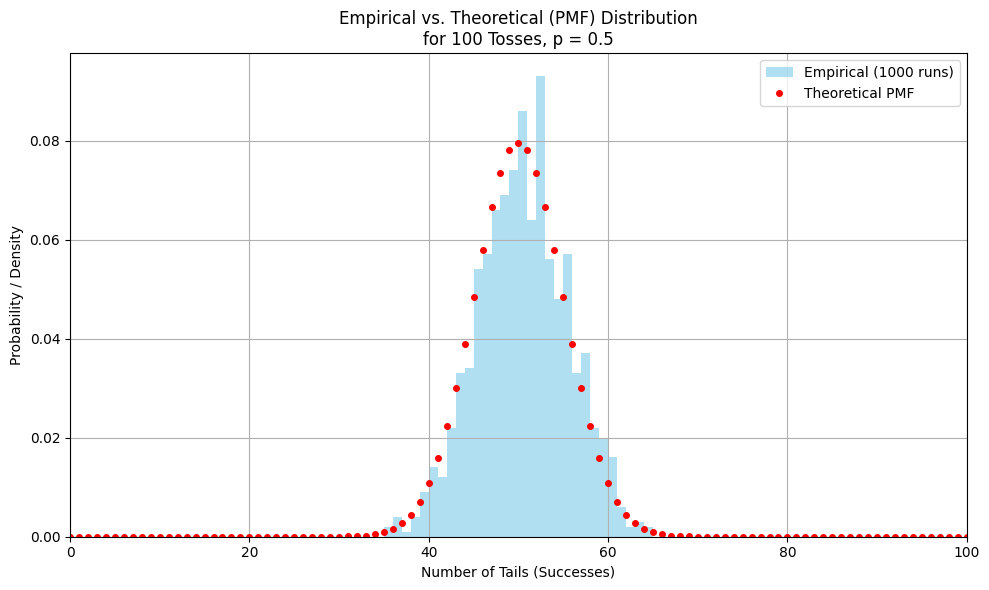

In [64]:
# Parameters
n = 100
p = 0.5

# --- Theoretical PMF ---
pmf = PMF_B(n, p)
Y_vals = np.array([item[0] for item in pmf])
prob_vals = np.array([item[1] for item in pmf])

# --- Empirical Distribution: 1000 rounds of 100 tosses ---
simulations = 1000
sim_results = [B(n, p) for _ in range(simulations)]

plt.figure(figsize=(10,6))
plt.hist(sim_results, bins=30, color='skyblue', alpha=0.65, density=True, label='Empirical (1000 runs)')
plt.plot(Y_vals, prob_vals, 'ro', markersize=4, label='Theoretical PMF')

plt.xlabel('Number of Tails (Successes)')
plt.ylabel('Probability / Density')
plt.title('Empirical vs. Theoretical (PMF) Distribution\nfor 100 Tosses, p = 0.5')
plt.legend()
plt.xlim(0, n)
plt.grid(True)
plt.tight_layout()
plt.show()

### Cummulative Density Function of B(n, p)

It's simply the sum of cummulated PMF over the support function of $0$ and $Y$ where I denoted successful experiment = $n$ (the number of experiments) with $Y$
$$F_y(y) = \sum_{i=0}^{\lfloor y \rfloor} \binom{n}{i} p^i (1-p)^{n-i}
$$

or rather correctly it's expressed as CDF is defined using a floor function $\lfloor y \rfloor$ which returns $y$ when $y$ is an integer, and the largest int smaller than $y$ when $y$ is not.

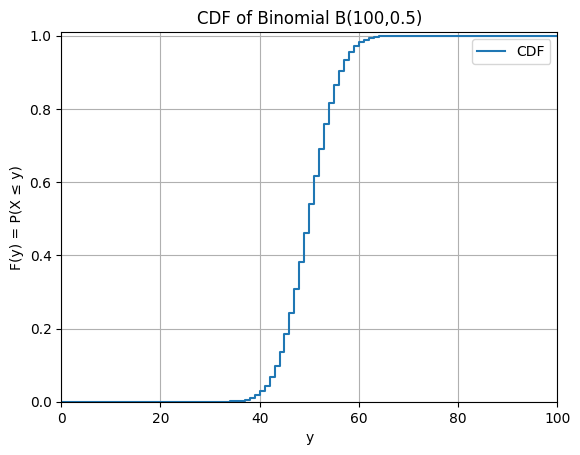

In [78]:
def CDF_B(PMF):
    """Converts PMF list to CDF list by cumulative summation"""
    cdf_list = []
    cumulative = 0
    for val, prob in PMF:
        cumulative += prob
        cdf_list.append([val, cumulative])
    return cdf_list


# -------- Usage ---------------
cdf = CDF_B(pmf) # pmf = PMF_B(n, p)
ys = [point[0] for point in cdf]
cdf_vals = [point[1] for point in cdf]

plt.step(ys, cdf_vals, where='post', label='CDF')
plt.xlabel('y')
plt.ylabel('F(y) = P(X ≤ y)')
plt.title(f'CDF of Binomial B({n},{p})')
plt.grid(True)
plt.xlim(0, n)
plt.ylim(0, 1.01)
plt.legend()
plt.show()

## Poisson 

Poisson rendom variables are used to measure counts os events over fixed time spans. For example, one application of a Poisson is to model the number of loan defaults / month. Poissions are always non-negatives, since - as there isn't such thing as negative probability - if $P(event) = 0.00...0$, than $E[Y]$ over theta = 0 for any theta window, given P=0 is constant over theta. Also Poisson random variables take integer values. 

The Poisson distro takes a single input $\lambda$ - "Lambda" - which is called the hazard rate, that signifies the average number of events / interval. Therfore, the mean and the varianve of $Y ~ Poisson(\lambda)$ is:$$E[Y] = V[Y] = \lambda$$

The PMF of a Poisson random variable is:$$f_y(y) = \frac{\lambda^y exp(-\lambda)}{y!}$$

Meanwhile the CDF is:$$F(y) = e^{-\lambda} \sum_{k=0}^{\lfloor y \rfloor} \frac{\lambda^k}{k!}$$

The Poisson parameter $\lambda$ can be tought of as the hazard rate in survival modelling. 

As an example, consider a FI pf that consists of a large number of bonds. On average, five bonds within the pf default monthly. Assuming theat the probability of any bond defaulting is independent of the other bonds, what is the probability that exactly 2 bonds default in one month? In this case y = 2, and $\lambda$ = 5 since the mean number of defaults is stated to be 5, thus $E[Y] = \lambda = 5$

Pr( Poisson(Y = 2) ) = 0.0842


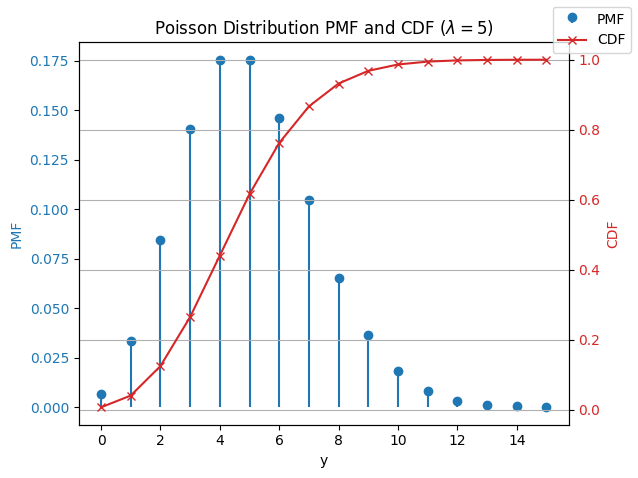

In [89]:
# Poisson PMF function
def poisson_pmf(lmbda, y):
    return (lmbda ** y) * math.exp(-lmbda) / math.factorial(y)

# Poisson CDF function
def poisson_cdf(lmbda, y):
    floor_y = int(np.floor(y))
    cdf_sum = 0
    for k in range(floor_y + 1):
        cdf_sum += poisson_pmf(lmbda, k)
    return cdf_sum

# Parameters
lmbda = 5  # average number of events (hazard rate)
max_y = 15 # The choice of max_y = 15 in the example
# plotting code was an arbitrary decision to define a practical range for visualization of the Poisson PMF and CDF.
# A common heuristic is to pick max_y ≈ λ + 3 * sqrt(λ) to capture over 99% of the probability mass.
#from math import sqrt
#print(str(lmbda + 3 * sqrt(lmbda))) # = 11.70820393249937
    
# Sample: probability that exactly 2 bonds default in one month
y_example = 2
prob_y_example = poisson_pmf(lmbda, y_example)
print(f"Pr( Poisson(Y = {y_example}) ) = {prob_y_example:.4f}")

# Prepare values for plotting
ys = list(range(max_y + 1))
pmf_vals = [poisson_pmf(lmbda, y) for y in ys]
cdf_vals = [poisson_cdf(lmbda, y) for y in ys]

# Plot PMF and CDF
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.stem(ys, pmf_vals, basefmt=" ", label='PMF', linefmt=color, markerfmt='o')

ax1.set_xlabel('y')
ax1.set_ylabel('PMF', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.title(r'Poisson Distribution PMF and CDF ($\lambda=5$)')

ax2 = ax1.twinx()  # instantiate second axes that shares x-axis
color = 'tab:red'
ax2.plot(ys, cdf_vals, color=color, marker='x', label='CDF')
ax2.set_ylabel('CDF', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

A useful feat of the Poisson (one that's uncommon among the rest of discrete distributions) is that is is infinitely divisible. If $X_1 ~ Poisson(\lambda_1)$, and $X_2 ~ Poisson(\lambda_2)$ are independent, and $Y = X_1 + X_2$ - e.g. no theta overlay -, then $Y ~ Poisson(\lambda_1 + \lambda_2). 

In other words, the sum of independent Poission variables is also a Poission. This feature makes the distribution well-suited to work with time-series data, because summing the number of events in a sampling interval (e.g. week, mon, qrtr) does not change the distribution.

[*********************100%***********************]  1 of 1 completed


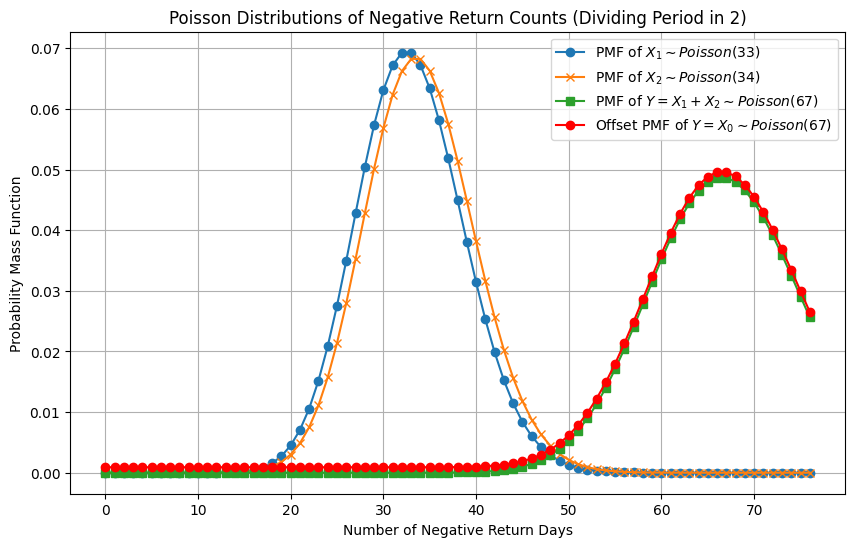

In [106]:
import yfinance as yf
from scipy.stats import poisson

# Download historical daily adjusted close price data for SPY
symbol = 'SPY'
start_date = '2023-01-01'
end_date = '2024-01-01'
a = 0.0009  # Slight offset for pmf_y to highlight the perfect overlay. Set to 0 to cause the overlay
b = 0.0



# Download historical data with auto_adjust=True
symbol = 'SPY'
start_date = '2023-05-11'
end_date = '2024-01-01'
price_data = yf.download(symbol, start=start_date, end=end_date, auto_adjust=True)

# Compute daily log returns
price_data['log_return'] = np.log(price_data['Close'] / price_data['Close'].shift(1))

# Count negative returns (returns < 0) as event counts
price_data['neg_return_event'] = (price_data['log_return'] < 0).astype(int)

# Split into two halves
mid = len(price_data) // 2
X1_lambda = price_data['neg_return_event'].iloc[:mid].sum()
X2_lambda = price_data['neg_return_event'].iloc[mid:].sum()
Y_lambda = price_data['neg_return_event'].sum() # Actual lambda over the whole theta interval

# Prepare x-range for PMF plotting
x_range = np.arange(0, max(X1_lambda, X2_lambda, Y_lambda) + 10)

# Calculate PMFs
pmf_X1 = poisson.pmf(x_range, X1_lambda)
pmf_X2 = poisson.pmf(x_range, X2_lambda)
pmf_X_1_2 = poisson.pmf(x_range, X1_lambda + X2_lambda)  # Y = X_1 + X_2, construct 
pmf_Y = poisson.pmf(x_range, Y_lambda)
pmf_Y_offset = pmf_Y + a + b * x_range

# Plot PMFs
plt.figure(figsize=(10, 6))
plt.plot(x_range, pmf_X1, label=f'PMF of $X_1 \\sim Poisson({X1_lambda})$', marker='o')
plt.plot(x_range, pmf_X2, label=f'PMF of $X_2 \\sim Poisson({X2_lambda})$', marker='x')
plt.plot(x_range, pmf_X_1_2, label=f'PMF of $Y = X_1 + X_2 \\sim Poisson({X1_lambda + X2_lambda})$', marker='s')
plt.plot(x_range, pmf_Y_offset, label=f'Offset PMF of $Y = X_0 \\sim Poisson({Y_lambda})$', color='red', marker='o')
plt.title('Poisson Distributions of Negative Return Counts (Dividing Period in 2)')
plt.xlabel('Number of Negative Return Days')
plt.ylabel('Probability Mass Function')
plt.legend()
plt.grid(True)
plt.show()


# Continous Random Variables!

### Uniform

The simplest continous rand. var is the uniform! A uniform distibution assumes that any value within the range $[a, b]$ is equally likely to occur. Remember the chance of the possible sum of rolls for a fair dice plotted for 1 toss in CH1? This is kinda similar, but the outcomes are not just ints, but rather p is constant over any continous (real?) value of y unlike for ints in case of dice roll!

The PDF of a uniform is: $$f_y(y) = \frac{1}{b-a}$$

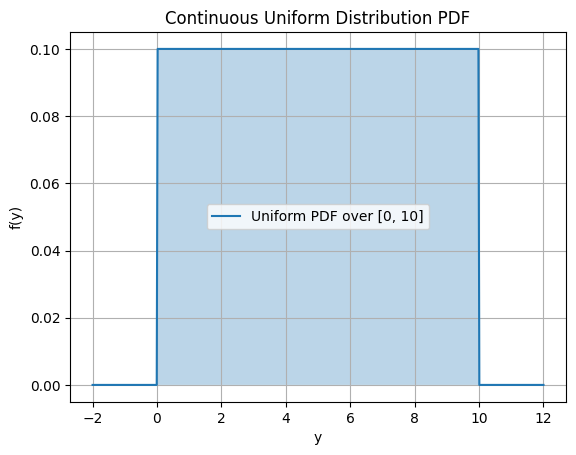

In [109]:
def PDF_Uniform(y, a, b):
    """
    Compute the PDF of continuous uniform distribution over [a,b] for input y.
    Returns 1/(b-a) if y in [a,b], else 0.
    """
    return np.where((y >= a) & (y <= b), 1/(b - a), 0)

# Parameters
a = 0
b = 10

# Values to evaluate
y_values = np.linspace(a - 2,      # ~ min value / start of X-axis
                       b + 2,      # ~ max value / start of X-axis
                       500         # 500 points is a sufficiently dense sampling to create a smooth continuous-looking curve on the plot.
                      )            # Tough the PDF is actually continous, for plotting we need to give a "resolution" basically
pdf_values = PDF_Uniform(y_values, # Passing the y_valuues 
                         a, b)

# Plot
plt.plot(y_values, pdf_values, label=f'Uniform PDF over [{a}, {b}]')
plt.fill_between(y_values, pdf_values, alpha=0.3)
plt.title('Continuous Uniform Distribution PDF')
plt.xlabel('y')
plt.ylabel('f(y)')
plt.grid(True)
plt.legend()
plt.show()